Number of iterations:2458


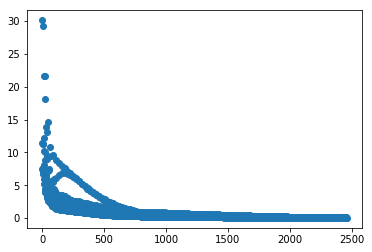

Number of iterations:49


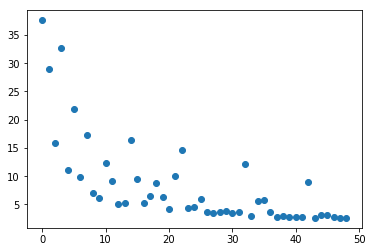

[-0.1217194   0.22892941 -0.41863433 -0.14459428  0.14337751  0.21974525
  0.31946855  0.12247492  0.4768595   0.53809959  0.52057899  0.30633209
 -0.23898603  0.0554015   0.24559319  0.56890264  0.4128256   0.464025
 -0.28776778 -0.7900174  -0.00534481 -0.76597332 -0.32647666]
[ 0.22434877  0.42379416 -0.09858315 -0.03830083  0.06617338 -0.33631813
  0.43006205 -0.09336494  0.09203639  0.50430696 -0.10221588 -0.11092791
  0.0227538   0.01556881 -0.03898696 -0.34631508  0.34969822  0.15469932
  0.02436625 -0.24888851  0.18398406 -0.45363777  0.53122097]
[ 0.4146487   1.02043256 -0.77313157 -1.01861515  0.46715889  1.05647941
 -0.09445866 -0.3132656   0.18182209  0.02105785  0.41218239  0.299662
 -1.23776217 -0.67456395  0.45754479  1.66277319 -0.01322231 -0.43940947
 -0.98711768  0.06529163  0.84381121 -0.11393557  0.0843608 ]


In [119]:
import numpy as np
from random import choice
import random
import matplotlib.pyplot as plt
episilon = 0.000001
def GetSolution(A, b, num_iterations, x_init):
    N = A.shape[0]
    x = x_init
    count = 0
    error_list = []
    prev_x = x
    for k in range(1, num_iterations):
        i = (k%N)
        numerator = b[i] - np.dot(A[i],x)
        x_prev = x
        denominator = np.linalg.norm(A[i])**2
        result = numerator/denominator
        prev_x = x
        x = x + result*A[i]
        error_list.append((((b - A.dot(x))**2).sum()))
        if(StoppingCriteriaValue(x, prev_x) < episilon):
            print("Number of iterations:"+str(len(error_list)))
            x = prev_x
            break
    plt.scatter(range(len(error_list)), error_list)
    plt.show()
    return x
def StoppingCriteriaValue(x, x_prev):
    return np.linalg.norm(x-x_prev)/max(1, np.linalg.norm(x_prev))
## Complexity of above method is O(num_iterations*N)
## Stopping criteria is when successive values of x does not change much i.e, (x(k+1)-x(k))/(x(k)) < episilon 
def GetSolutionUsingRandomness(A, b, num_iterations,x_init):
    N = A.shape[0]
    x = x_init
    count = 0
    error_list = []
    weights = np.sum(np.abs(A)**2,axis=-1)
    probs = list(np.array(weights)/np.sum(weights))
    prev_x = x
    for k in range(1, num_iterations):
        i = np.random.choice(np.arange(N),1, p= probs)[0]
        numerator = b[i] - np.dot(A[i],x)
        denominator = np.linalg.norm(A[i])**2
        result = numerator/denominator
        prev_x = x
        x = x + result*A[i]
        error_list.append((((b - A.dot(x))**2).sum()))
        if(StoppingCriteriaValue(x, prev_x) < episilon):
            print("Number of iterations:"+str(len(error_list)))
            x = prev_x
            break
    plt.scatter(range(len(error_list)), error_list)
    plt.show()
    return x
if __name__=="__main__":
    N = random.randint(10,100)
    A= np.random.rand(N,N)
    b = np.random.rand(N)
    x_init = np.random.rand(N)
    num_iterations = 10000
    x1 = GetSolution(A,b,num_iterations,x_init)
    x2 = GetSolutionUsingRandomness(A,b,num_iterations,x_init)
    x3 = np.dot(np.linalg.inv(A),b)
    print(x1)
    print(x2)
    print(x3)
        

In [120]:
0.69/0.82

0.8414634146341463

In [27]:
exp = np.ones((3,3))
row = np.array([1,2,-7.9])
print(exp)
print(list(np.sum(np.abs(exp)**2,axis=-1)))
print(exp[0])
print(np.linalg.norm(exp[0]))
print(np.dot(exp[0],row))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[3.0, 3.0, 3.0]
[1. 1. 1.]
1.7320508075688772
-4.9


In [93]:
l = [1,2,3,4,5]
print(l[-2:-1])
print(max(3,4))

[4]
4
